Question 1:

(n,k) and (k,m) matrices are given. In Matrix Multiplication, we keep on multiplying elements along the row of the first matrix and the column of the second matrix and then finally add them. Thus, total multiplications for 1 element of the final matrix = k and total additions for 1 element of the final matrix = k-1. Now, we have the final matrix as (n,m). Thus, the total multiplications = nmk and the total additions = nm(k-1).

In [ ]:
#Question 2a

#let us assume a 3x3 and 3x3 matrix for simplicity. Solved using nested lists
import time

A = [[1,2,3,6],[4,5,6,9],[7,8,9,7],[5,3,7,8]]
B = [[1,2,3,6],[4,5,6,9],[7,8,9,7],[5,3,7,8]]

start = time.time_ns()

rows_A = len(A)
cols_A = len(A[0])
rows_B = len(B)
cols_B = len(B[0])

ans = [[0 for i in range(cols_B)] for i in range(rows_A)]

for i in range(rows_A):
    for j in range(cols_B):
        for k in range(cols_A):
            ans[i][j] += A[i][k] * B[k][j]

end = time.time_ns()

print("Time Taken:" ,end - start,"ns")

for i in ans:
    print(i)

In [ ]:
#Question 2b

#Solved using numpy

import numpy as np
import time

A = [[1,2,3,6],[4,5,6,9],[7,8,9,7],[5,3,7,8]]
B = [[1,2,3,6],[4,5,6,9],[7,8,9,7],[5,3,7,8]]

start = time.time_ns()

rows_A = len(A)
cols_A = len(A[0])
rows_B = len(B)
cols_B = len(B[0])

ans = [[0 for _ in range(cols_B)] for _ in range(rows_A)]

ans = np.dot(A,B)

end = time.time_ns()

print("Time Taken:" ,end - start,"ns")

for i in ans:
    print(i)

We can observe that the numpy code runs faster than the nested list code. This is because of the fact that numpy is implemented in C which is a faster language than Python and is more efficient and optimized for numerical operations. As the matrices become larger and larger, the difference in time taken to multiply them becomes even bigger.

In [ ]:
#Question 3a

A = [1,2,3,4,5,6,7,8,9]
start = time.time_ns()
size_A = len(A)
n = int(size_A/2)
if size_A == 1:
    print(A[0])

B = A.copy()
for i in range(n+1):
    maxi_idx = 0
    for j in range(len(A)):
        if A[maxi_idx] < A[j]:
            maxi_idx = j
    A.pop(maxi_idx)
end = time.time_ns()

print("Time Taken:" ,end - start,"ns")

print(B[maxi_idx])

    

The time complexity of the above method is n^2. A better method would be to sort the array which takes n*log(n) time and the return the middle value.

In [ ]:
#Question 3b

import time
A = [1,2,3,4,5,6,7,8,9]
size_A = len(A)
start = time.time_ns()
A.sort()
index = int(size_A/2)
end = time.time_ns()

print("Time Taken:" ,end - start,"ns")
print(A[index])

In [ ]:
#Question 3c

import numpy as np
import time
A = [1,2,3,4,5,6,7,8,9]
start = time.time_ns()
ans = np.median(A)
end = time.time_ns()

print("Time Taken:" ,end - start,"ns")
print(ans)

In [30]:
!pip install --upgrade pip
!pip install --upgrade "jax[cpu]"

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


As we can see, the numpy method works best. Then the sorting method and then the trivial method.

Question 4:

Gradient w.r.t. x:
2*x*y + (y^3)*cos(x)

Gradient w.r.t. y:
x^2 + 3*(y^2)*sin(x)

In [16]:
import jax
import numpy as np
import math

def my_function(x, y):
    return (x**2) * y + (y**3)*jax.numpy.sin(x)


def analytical_solution(x, y):
    grad_x = 2 * x * y + (y**3) * math.cos(x)
    grad_y = x**2 + 3 * (y**2) * math.sin(x)
    return grad_x, grad_y


def gradient_function(x_val, y_val):
    grad_f_x = jax.grad(my_function, argnums=0)
    grad_f_y = jax.grad(my_function, argnums=1)  

    gradient_at_x = grad_f_x(x_val, y_val)
    gradient_at_y = grad_f_y(x_val, y_val)
    
    return float(gradient_at_x), float(gradient_at_y)

x_value = 2.0
y_value = 3.0

analytical_gradients = analytical_solution(x_value, y_value)

print(analytical_gradients)
print(gradient_function(x_value,y_value))


(0.7640354132271554, 28.551030524293406)
(0.7640352249145508, 28.551029205322266)


In [46]:
!pip install sympy --user

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [4]:
#Question 6

import sympy as sp
from sympy import symbols

x, y = symbols('x y')

my_func = (x**2)*y + (y**3)*sp.sin(x)

print(my_func.diff(x))
print(my_func.diff(y))

2*x*y + y**3*cos(x)
x**2 + 3*y**2*sin(x)


In [7]:
!pip install matplotlib --user

  Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl.metadata (5.9 kB)
  Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl.metadata (5.8 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached matplotlib-3.8.2-cp311-cp311-win_amd64.whl (7.6 MB)
Using cached contourpy-1.2.0-cp311-cp311-win_amd64.whl (187 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)


DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


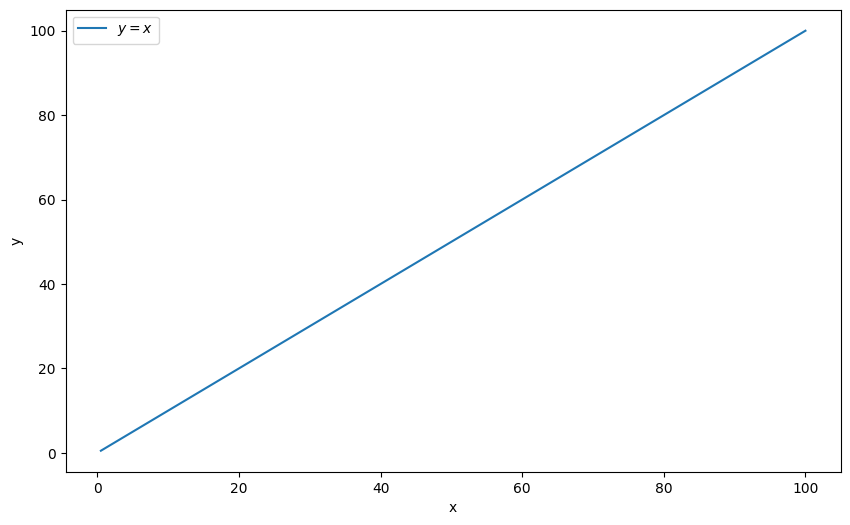

In [10]:
#Question 9a

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def y(x):
    return x

x_values = np.arange(0.5, 100.5, 0.5)

y_values = y(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$y = x$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()


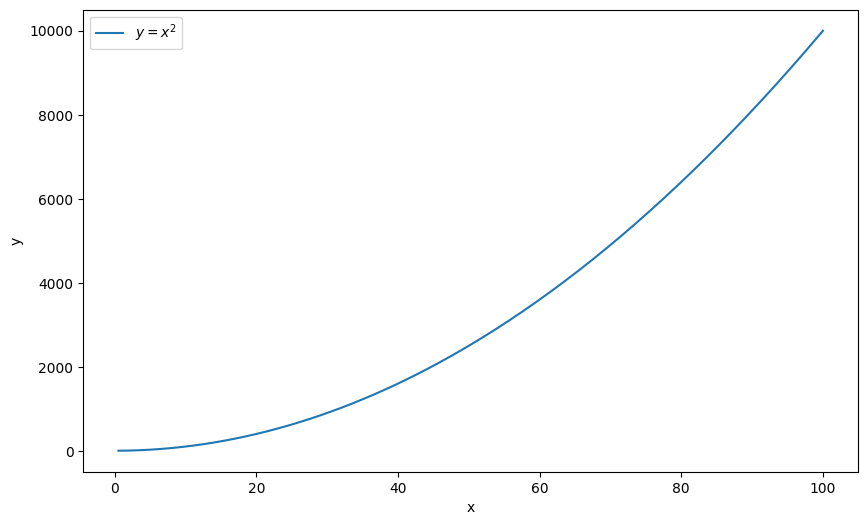

In [11]:
#Question 9b

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def y(x):
    return x**2

x_values = np.arange(0.5, 100.5, 0.5)

y_values = y(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$y = x^2$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

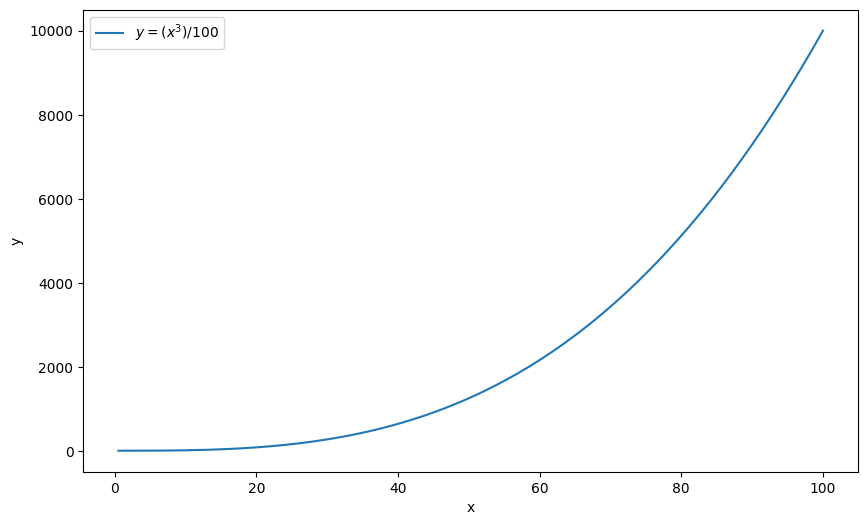

In [12]:
#Question 9c

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def y(x):
    return (x**3)/100

x_values = np.arange(0.5, 100.5, 0.5)

y_values = y(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$y = (x^3)/100$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

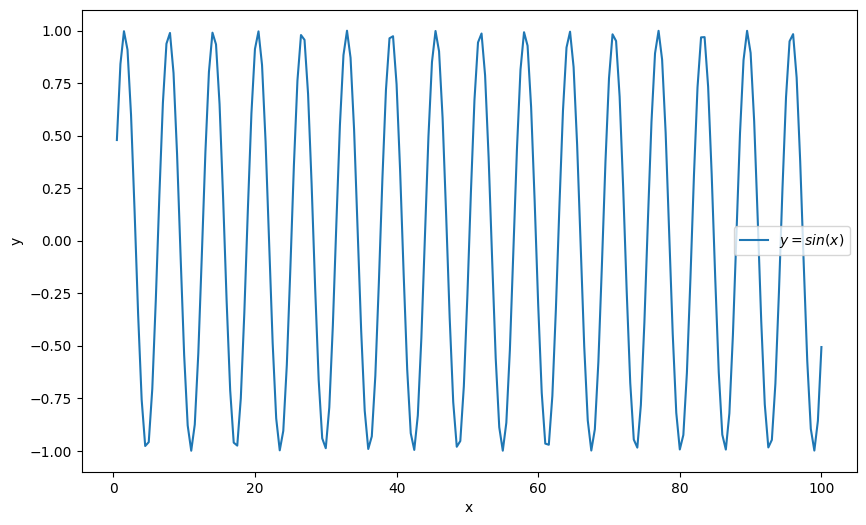

In [14]:
#Question 9d

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def y(x):
    return np.sin(x)

x_values = np.arange(0.5, 100.5, 0.5)

y_values = y(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$y = sin(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

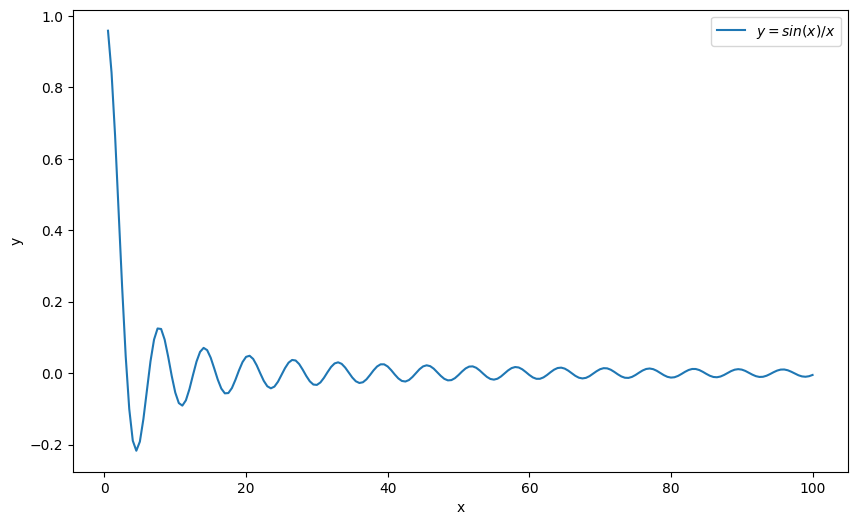

In [15]:
#Question 9e

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def y(x):
    return (np.sin(x))/x

x_values = np.arange(0.5, 100.5, 0.5)

y_values = y(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$y = sin(x)/x$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

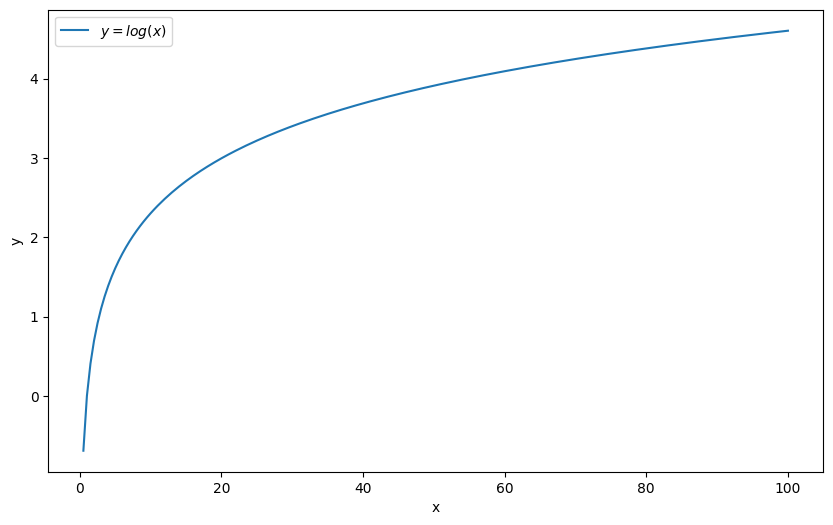

In [16]:
#Question 9f

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def y(x):
    return np.log(x)

x_values = np.arange(0.5, 100.5, 0.5)

y_values = y(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$y = log(x)$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

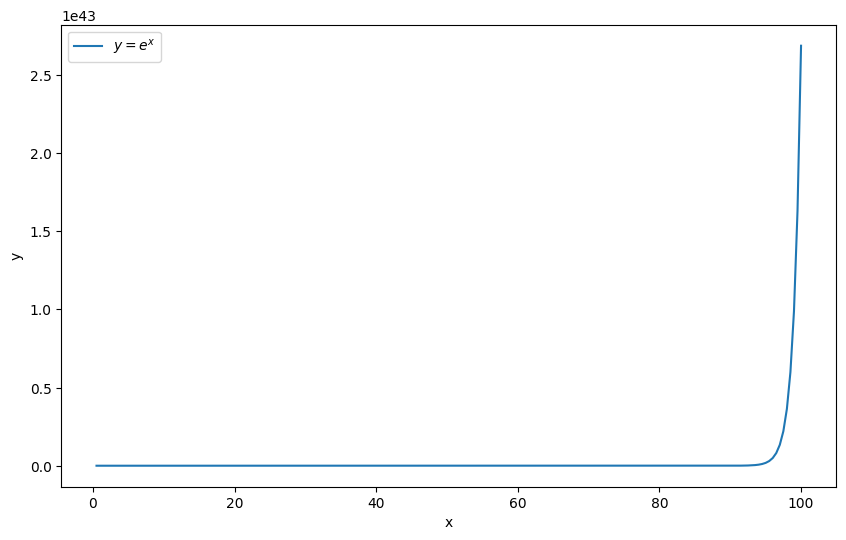

In [17]:
#Question 9g

import matplotlib.pyplot as plt
import numpy as np

# Define the functions
def y(x):
    return np.exp(x)

x_values = np.arange(0.5, 100.5, 0.5)

y_values = y(x_values)

plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label=r'$y = e^x$')

plt.xlabel('x')
plt.ylabel('y')
plt.legend()

plt.show()

In [18]:
#Question 12

A = np.array([1.0, 2.0, 3.0])
B = np.array([4.0, 5.0, 6.0])\

print(type(A*B))
print(A*B)

<class 'numpy.ndarray'>
[ 4. 10. 18.]


Broadcasting is a feature in numpy that allows for arithmetic operations between arrays of different shapes and sizes. It simplifies the process of performing element-wise operations on arrays without explicitly reshaping them. 

In [20]:
#Question 13

import numpy as np

def mini(arr):
    min_idx = 0
    min_value = arr[0]

    for i in range(len(arr)):
        if arr[i] < min_value:
            min_value = arr[i]
            min_idx = i

    return min_idx

A = np.array([5, 2, 8, 1, 3, 7, 4])

ans = mini(A)

ans_np = np.argmin(A)

print(ans)
print(ans_np)

3
3


In [27]:
#Question 7
import json

ans = {2022:{'Branch 1':{'Roll Number':1,'Name':'N','Marks':{'Maths':100,'English':70}},"Branch 2":""},2023:{"Branch 1":"","Branch 2":""},2024:{"Branch 1":"","Branch 2":""},2025:{"Branch 1":"","Branch 2":""}}
print(json.dumps(ans, indent=2))

{
  "2022": {
    "Branch 1": {
      "Roll Number": 1,
      "Name": "N",
      "Marks": {
        "Maths": 100,
        "English": 70
      }
    },
    "Branch 2": ""
  },
  "2023": {
    "Branch 1": "",
    "Branch 2": ""
  },
  "2024": {
    "Branch 1": "",
    "Branch 2": ""
  },
  "2025": {
    "Branch 1": "",
    "Branch 2": ""
  }
}


In [29]:
!pip install pandas

   ---------------------------------------- 0.0/10.6 MB ? eta -:--:--
   ---------------------------------------- 0.1/10.6 MB ? eta -:--:--
    --------------------------------------- 0.2/10.6 MB 3.3 MB/s eta 0:00:04
   - -------------------------------------- 0.4/10.6 MB 3.8 MB/s eta 0:00:03
   - -------------------------------------- 0.5/10.6 MB 3.7 MB/s eta 0:00:03
   -- ------------------------------------- 0.7/10.6 MB 3.3 MB/s eta 0:00:04
   --- ------------------------------------ 0.8/10.6 MB 3.4 MB/s eta 0:00:03
   ---- ----------------------------------- 1.1/10.6 MB 3.8 MB/s eta 0:00:03
   ---- ----------------------------------- 1.2/10.6 MB 3.9 MB/s eta 0:00:03
   ----- ---------------------------------- 1.4/10.6 MB 3.8 MB/s eta 0:00:03
   ----- ---------------------------------- 1.5/10.6 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.7/10.6 MB 3.8 MB/s eta 0:00:03
   ------ --------------------------------- 1.8/10.6 MB 3.6 MB/s eta 0:00:03
   ------- --

DEPRECATION: Loading egg at c:\python311\lib\site-packages\vboxapi-1.0-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330


In [33]:
#Question 10

import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

maxi_std_col = df.std().idxmax()

mini_mean_row = df.mean(axis=1).idxmin()

print(df)
print("Col with max std dev: ",maxi_std_col)
print("row with min mean: ",mini_mean_row)


           a         b         c         d         e
0   1.104755  1.291296  1.366696  1.277007  1.242148
1   1.693671  1.881280  1.097209  1.254583  1.565338
2   1.293382  1.445476  1.212826  1.937566  1.424289
3   1.096161  1.302591  1.858437  1.802084  1.666731
4   1.720286  1.046617  1.185948  1.165766  1.713538
5   1.024125  1.122617  1.816530  1.044431  1.131786
6   1.006924  1.459433  1.167045  1.432727  1.398912
7   1.696486  1.585963  1.743768  1.005691  1.694783
8   1.439411  1.818757  1.916192  1.253765  1.683380
9   1.997943  1.567063  1.367771  1.565550  1.416289
10  1.227943  1.311733  1.808420  1.123553  1.413369
11  1.480167  1.281856  1.085315  1.280132  1.153262
12  1.163321  1.356736  1.669517  1.319351  1.049209
13  1.759893  1.878178  1.070448  1.868209  1.849741
14  1.164912  1.695648  1.768537  1.272474  1.951146
15  1.335792  1.946983  1.754411  1.166702  1.745964
16  1.102111  1.506520  1.870787  1.759360  1.687045
17  1.238380  1.220215  1.390961  1.355848  1.

In [34]:
#Question 11

import numpy as np
import pandas as pd

mat = np.random.uniform(1, 2, size=(20, 5))

df = pd.DataFrame(mat, columns=['a', 'b', 'c', 'd', 'e'])

df['f'] = df[['a', 'b', 'c', 'd', 'e']].sum(axis=1)

df['g'] = np.where(df['f'] < 8, 'LT8', 'GT8')

num_rows_LT8 = df[df['g'] == 'LT8'].shape[0]

std_dev_LT8 = df.loc[df['g'] == 'LT8', 'f'].std()
std_dev_GT8 = df.loc[df['g'] == 'GT8', 'f'].std()

print(df)

print("Number of rows where 'g' is 'LT8':", num_rows_LT8)
print("Standard deviation of column 'f' where 'g' is 'LT8':", std_dev_LT8)
print("Standard deviation of column 'f' where 'g' is 'GT8':", std_dev_GT8)


           a         b         c         d         e         f    g
0   1.736870  1.974668  1.223143  1.651094  1.302484  7.888258  LT8
1   1.769781  1.966400  1.564626  1.149830  1.819036  8.269673  GT8
2   1.334117  1.548837  1.713321  1.235526  1.213462  7.045263  LT8
3   1.194786  1.171124  1.063010  1.317413  1.240466  5.986798  LT8
4   1.075773  1.571007  1.853064  1.226261  1.611980  7.338085  LT8
5   1.778803  1.658476  1.908917  1.179593  1.807457  8.333246  GT8
6   1.444460  1.900074  1.102311  1.561629  1.739759  7.748233  LT8
7   1.242767  1.798291  1.581470  1.793725  1.516443  7.932697  LT8
8   1.208878  1.603912  1.736118  1.058546  1.244080  6.851534  LT8
9   1.349944  1.218836  1.900253  1.936767  1.121169  7.526970  LT8
10  1.919888  1.864097  1.412663  1.017780  1.744839  7.959266  LT8
11  1.370467  1.066075  1.484389  1.142920  1.477319  6.541171  LT8
12  1.431227  1.723698  1.849408  1.290194  1.188489  7.483016  LT8
13  1.867155  1.225033  1.860724  1.369321  1.14

In [12]:
#Question 8

class Student:
    def __init__(self, roll_number, name):
        self.roll_number = roll_number
        self.name = name
        self.marks = {}

    def add_subject_mark(self, subject, mark):
        self.marks[subject] = mark

class Branch:
    def __init__(self):
        self.students = []

    def add_student(self, student):
        self.students.append(student)

class Year:
    def __init__(self, year):
        self.year = year
        self.branches = {}

    def add_branch(self, branch_name):
        self.branches[branch_name] = Branch()

    def add_student_to_branch(self, branch_name, student):
        if branch_name in self.branches:
            self.branches[branch_name].add_student(student)

year_2022 = Year(2022)
year_2022.add_branch('Branch 1')
year_2022.add_branch('Branch 2')

student1 = Student(1, 'N')
student1.add_subject_mark('Maths', 100)
student1.add_subject_mark('English', 70)
year_2022.add_student_to_branch('Branch 1', student1)

year_2023 = Year(2023)
year_2023.add_branch('Branch 1')
year_2023.add_branch('Branch 2')

year_2024 = Year(2022)
year_2024.add_branch('Branch 1')
year_2024.add_branch('Branch 2')

year_2025 = Year(2022)
year_2025.add_branch('Branch 1')
year_2025.add_branch('Branch 2')

print(year_2022.year)
print(year_2022.branches['Branch 1'].students[0].roll_number)
print(year_2022.branches['Branch 1'].students[0].name)

#a

2022
1
N
